# launch ichthyop simulations

In [1]:
import pandas as pd

import taos.mars as ms
import taos.drifters as dr

work_dir = "/home/datawork-lops-osi/aponte/taos/ichthy"

--- 

## overview of the area

{'fig': <Figure size 720x360 with 2 Axes>,
 'ax': <GeoAxesSubplot:title={'center':'water depth [m]'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x2aaaecd70490>}

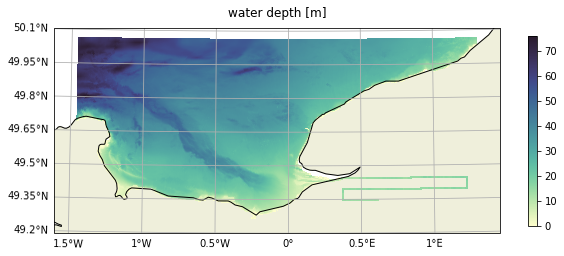

In [2]:
ds = ms.load_date("2011-01-01 00:00:00")

ms.plot_bs(-ds["z"].isel(time=0, level=0), 
           title="water depth [m]",
           vmin=0,
           cmap=ms.cm.deep,
           zoom=0, figsize=0,
          )

---

## simple case: 1 run

In [3]:
cfg = dict(initial_time="year 2011 month 01 day 01 at 01:00",
           transport_duration="0030 day(s) 00 hour(s) 00 minute(s)",
           number_particles=500,
           lon_stain=-0.25,
           lat_stain=49.4,
           depth_stain=-0.0,
           radius_stain=1000,
           thickness_stain=1.0,
          )

In [8]:
dr.ichthy("test0", workdir=work_dir, **cfg)

Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/test0
{'initial_time': 'year 2011 month 01 day 01 at 01:00', 'transport_duration': '0010 day(s) 00 hour(s) 00 minute(s)', 'number_particles': 500, 'lon_stain': -0.25, 'lat_stain': 49.4, 'depth_stain': -0.0, 'radius_stain': 1000, 'thickness_stain': 1.0, 'input_path': '/home/ref-oc-public/modeles_marc/f1_e2500_agrif/MARC_F1-MARS3D-SEINE/best_estimate/2011/', 'file_filter': '*MARC_F1-MARS3D-SEINE_201101*.nc'}
{'initial_time': True, 'transport_duration': True, 'number_particles': True, 'lon_stain': True, 'lat_stain': True, 'depth_stain': True, 'radius_stain': True, 'thickness_stain': True, 'input_path': True, 'file_filter': True}
File cfg.xml has been generated
6886483.datarmor0


---

# launch runs at different time periods

In [3]:
files = ms.browse_files()
print("Number of data files = {} ".format(len(files)))

print("First available date: {}".format(files.index.min()))
print("Last available date: {}".format(files.index.max()))

Number of data files = 79103 
First available date: 2010-01-01 01:00:00+00:00
Last available date: 2019-01-01 00:00:00+00:00


In [4]:
cfg = dict(initial_time="year 2011 month 01 day 01 at 01:00",
           transport_duration="0025 day(s) 00 hour(s) 00 minute(s)",
           number_particles=500,
           lon_stain=-0.25,
           lat_stain=49.4,
           depth_stain=-0.0,
           radius_stain=1000,
           thickness_stain=1.0,
          )

In [5]:
t_range = pd.date_range(start="2011/02/01", end="2018/12/01", freq='MS')    

for t, i in zip(t_range, range(t_range.size)):
    print(t, i)
    cfg["initial_time"] = dr.format_date(t)
    dr.ichthy(t.strftime("t_%Y%m"),
              jobname="ic{:03d}".format(i),
              workdir=work_dir,
              **cfg,
             )

2011-02-01 00:00:00 0
Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/t_201102
File cfg.xml has been generated
6947331.datarmor0
2011-03-01 00:00:00 1
Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/t_201103
File cfg.xml has been generated
6947333.datarmor0
2011-04-01 00:00:00 2
Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/t_201104
File cfg.xml has been generated
6947334.datarmor0
2011-05-01 00:00:00 3
Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/t_201105
File cfg.xml has been generated
6947335.datarmor0
2011-06-01 00:00:00 4
Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/t_201106
File cfg.xml has been generated
6947336.datarmor0
2011-07-01 00:00:00 5
Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/t_201107
File cfg.xml has been generated
6947337.datarmor0
2011-08-01 00:00:00 6
Run will be stored in /home/datawork-lops-osi/aponte/taos/ichthy/t_201108
File cfg.xml has been genera

---
### may need to go back to the right start dir if hick ups

In [11]:
%pwd

'/home1/datahome/aponte/taos/drifters'

In [10]:
cd /home1/datahome/aponte/taos/drifters

/home1/datahome/aponte/taos/drifters
